# Run Augmentations

In [1]:
import os
import torch
from torch.optim import lr_scheduler
import torch.nn as nn
import torchvision.transforms as transforms
import sys
sys.path.append('../')
from drive_dataset import DriveData_LMDB
from drive_dataset import AugmentDrivingTransform
from drive_dataset import DrivingDataToTensor
from torch.utils.data import DataLoader

import cv2
import matplotlib
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

training_dir = '/home/ubuntu/datasets/Dataset_LMDB_Original/'

In [2]:
dataset = DriveData_LMDB(training_dir)

Load LMDB: /home/ubuntu/datasets/Dataset_LMDB_Original/


Steering angle: 0.01502072


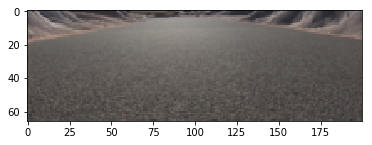

In [3]:
# Get Item from dataset
sample = dataset[0]
plt.imshow(sample['image'])
print('Steering angle:', sample['label'])

In [4]:
def random_brightness(image):    
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.5 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def convert_to_gray(img):
    # Get each channel
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    # To keep same number of channels add gray to each one.
    img_new = img.copy()
    img_new[:, :, 0] = gray
    img_new[:, :, 1] = gray
    img_new[:, :, 2] = gray
    return img_new

def convert_to_sepia(img):
    # Get each channel
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    img_new = img.copy()
    img_new[:, :, 0] = 0.393 * r + 0.769 * g + 0.189 * b
    img_new[:, :, 1] = 0.349 * r + 0.686 * g + 0.168 * b
    img_new[:, :, 2] = 0.272 * r + 0.534 * g + 0.131 * b
    return img_new

def color_swap(img):
    new_img = img.copy()
    list_chanels = [0, 1, 2]
    random.shuffle(list_chanels)
    new_img[:, : ,0] = img[:, :, list_chanels[0]]
    new_img[:, :, 1] = img[:, :, list_chanels[1]]
    new_img[:, :, 2] = img[:, :, list_chanels[2]]
    return new_img

def add_noise(img):
    row,col,ch = img.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch) / 20
    new_img = img + img * gauss
    return new_img

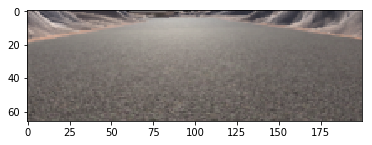

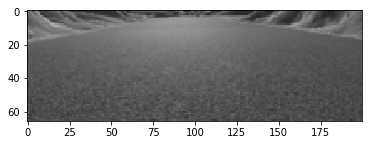

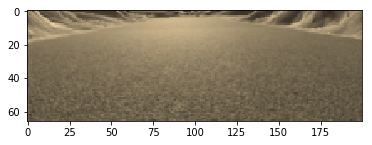

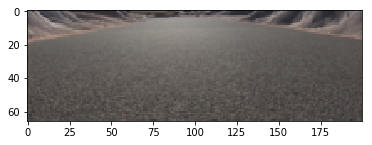

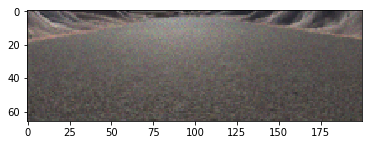

Steering angle: 0.01502072


In [5]:
# Get Item from dataset
plt.imshow(random_brightness(sample['image']))
plt.show()
plt.imshow(convert_to_gray(sample['image']))
plt.show()
plt.imshow(convert_to_sepia(sample['image']))
plt.show()
plt.imshow(color_swap(sample['image']))
plt.show()
plt.imshow(add_noise(sample['image']))
plt.show()
print('Steering angle:', sample['label'])